### Install Dependencies 

- To train the following network, we use a framework named Keras.
- Keras provides functions for Convolution layers, Activation layers, MaxPooling layer, etc. so we don't need write code for designing such layers. Instead we can focus on creating better network architecture
- Following lines of code installs Keras on the system

In [0]:
# https://keras.io/
!pip install -q keras
import keras

### Import Libraries and Modules

In [0]:
# Import Numpy for matrices and multi-dimensional array's processing
import numpy as np

# Import Sequential to write model layer-by-layer in sequence 
from keras.models import Sequential

# Import Flatten layer to flatten feature-map, Dropout to avoid overfitting
from keras.layers import Flatten, Dropout

# Import Convolution layer to perform convolution on the channels, MaxPooling to reduce dimensions of channel
from keras.layers import Convolution2D, MaxPooling2D

# Import np_utils for one-hot-encoding
from keras.utils import np_utils

# Import hand written dataset of numbers from 0-9
from keras.datasets import mnist

### Load the Data
The data is loaded in following variables:

- X_train: Samples used during training the network
- y_train: Corresponding labels for training data
- X_test: Samples used for validation after training the network
- y_test: Corresponding labels for the validation of network's performance

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Dataset Information and Display Data Sample
- We have 60000 images in training dataset
- We have 10000 images in the testing dataset
- Each image's dimension are 28x28x1

(60000, 28, 28)
(10000, 28, 28)


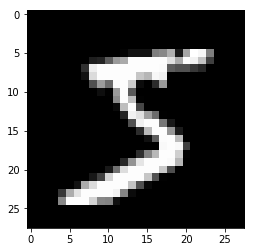

In [25]:
# Dimensions of the training dataset images
print (X_train.shape)

# Dimensions of the testing dataset images
print (X_test.shape)

# Import python module for plotting the image
from matplotlib import pyplot as plt

# Below line is written to display an image in this notebook
%matplotlib inline

# Plotting first image in the training dataset
# cmap='gray' displays the data sample in appropriate color space
plt.imshow(X_train[0], cmap='gray')

### Reshape the dataset
- Keras requires the input data in a form of 4D tensor
- The first value represents the total number of images in a training/testing dataset
- Second and third values are dimensions of an image
- Fourth value is the number of channels (1 for grayscale and 3 for RGB)  

Thus, the X_train will have a shape of (60000, 28, 28, 1)  
and the X_test will have a shape of (1000, 28, 28, 1)

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

### Normalizing the Data
- When a Kernel is convolved over an input image, the maximum pixel value in the feature-map depends upon the maximum pixel value in the kernel
- Different kernels will have different maximum values and so their corresponding feature-maps will have different maximum values
- The feature-map with greater maximum pixel value will be louder while training the network
- To avoid biased activations of such kernels, we perform Normalization
- For normalization, we first convert the data into float so that we can get all the decimal values
- By dividing all the pixels by 255, all the pixel values will be restricted between 0.0 to 1.0. This is how we normalize the data.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### Print Labels

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### One-Hot Encoding
- It is way of representing labels
- Instead of using one-single scalar for labels, we use a vector to represent the labels.
- The position of the ground-truth is marked as 1 while other positions are marked as 0
- The network cannot print out the prediction as 0,1,2,....9
- Instead it can activate the neuron associated with these numbers. So, the last layer before activation layer has number of neurons equal to number of classes (in this case 10)
- The neuron associated with the number is set as 1 while other neurons are set as 0. Following is the pattern in which encoding is done:  
  - Number 0 is encoded as 1000000000  
  - Number 1 is encoded as 0100000000  
  - Number 2 is encoded as 0010000000  
   .  
   .  
   .  
   .  
  - Number 9 is encoded as 0000000001

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

### Print Labels after one-hot encoding

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Model Architecture

- Model is defined sequential
- The model has convolution, maxpooling, flatten and softmax layers

- **Convolution Layer:**
  - It is a process of extracting features from a channel using a kernel (feature extractor)
![](https://github.com/Shilpaj1994/Phase1_assignments/blob/master/Assignment%201/5-3ConvolutionSmall.gif?raw=true)

- **MaxPooling Layer:**
  - It reduces the dimension of an channel. If we use MaxPooling of 2x2, dimension of an channel will become half of input channel
  - It only passes the louder pixel value in the next layer
![](https://github.com/Shilpaj1994/Phase1_assignments/blob/master/Assignment%203/Files/maxpool.gif?raw=true)

- **Softmax Layer:**
  - It is like probability
  - It gives score of a class between 0 and 1
![](https://github.com/Shilpaj1994/Phase1_assignments/blob/master/Assignment%201/softmax.png?raw=true)

- **Flatten Layer:**
  - It flattens the input dimension
  - Multiple 2D channels are converted into a vector 

In [10]:
# Set the dropout rate i.e. how many % of neurons to drop during training to avoid overfitting
# In below architecture, Dropout Layer drops 10% neurons during training
drop = 0.10 

# Define Sequential Model Type
model = Sequential()

# Layer 1: Input:28x28x1  |  Kernels:(3x3x1)x32  |  Output:26x26x32  |  Receptive Field:3x3 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1), name='conv_1'))
model.add(Dropout(drop))

# Layer 2: Input:26x26x32  |  Kernels:(3x3x32)x16  |  Output:24x24x16  |  Receptive Field:5x5 
model.add(Convolution2D(16, 3, 3, activation='relu', name='conv_2'))
model.add(Dropout(drop))

# Layer 3: Input:24x24x16  |  Kernels:(3x3x16)x16  |  Output:22x22x16  |  Receptive Field:7x7 
model.add(Convolution2D(16, 3, 3, activation='relu', name='conv_3'))
model.add(Dropout(drop))

# Layer 4: Input:22x22x16  |  Kernels:(1x1x16)x10  |  Output:22x22x10  |  Receptive Field:7x7 
model.add(Convolution2D(10, 1, 1, activation='relu', name='conv_4_1x1'))

# Layer 5: Input:22x22x10  |  MaxPooling:(2x2)  |  Output:11x11x10  |  Receptive Field:14x14 
model.add(MaxPooling2D(2, name='MP'))

# Layer 6: Input:11x11x10  |  Kernels:(3x3x10)x12  |  Output:9x9x12  |  Receptive Field:16x16 
model.add(Convolution2D(12, 3, 3, activation='relu', name='conv_5'))
model.add(Dropout(drop))

# Layer 7: Input:9x9x12  |  Kernels:(3x3x12)x16  |  Output:7x7x16  |  Receptive Field:18x18 
model.add(Convolution2D(16, 3, 3, activation='relu', name='conv_6'))
model.add(Dropout(drop))

# Layer 8: Input:7x7x16  |  Kernels:(3x3x16)x16  |  Output:5x5x16  |  Receptive Field:20x20 
model.add(Convolution2D(16, 3, 3, activation='relu', name='conv_7'))
model.add(Dropout(drop))

# Layer 9: Input:5x5x16  |  Kernels:(1x1x16)x12  |  Output:5x5x12  |  Receptive Field:20x20 
model.add(Convolution2D(12, 1, 1, activation='relu', name='conv_8_1x1'))
model.add(Dropout(drop))

# Layer 10: Input:5x5x12  |  Kernels:(3x3x12)x12  |  Output:5x5x12  |  Receptive Field:22x22  |  Padding='same' 
model.add(Convolution2D(12, 3, padding='same', activation='relu'))
model.add(Dropout(drop))

# Layer 11: Input:5x5x12  |  Kernels:(3x3x12)x12  |  Output:3x3x12  |  Receptive Field:24x24 
model.add(Convolution2D(12, 3, 3, activation='relu'))
model.add(Dropout(drop))

# Layer 12: Input:3x3x12  |  Kernels:(3x3x12)x12  |  Output:3x3x12  |  Receptive Field:26x26  |  Padding='same' 
model.add(Convolution2D(12, 3, padding='same', activation='relu'))
model.add(Dropout(drop))

# Layer 13: Input:3x3x12  |  Kernels:(3x3x12)x10  |  Output:1x1x10  |  Receptive Field:28x28 
model.add(Convolution2D(10, 3, 3))

# Layer 14: Input:1x1x10  |  Output:10
model.add(Flatten())

# Layer 15: Activation Layer
model.add(Activation('softmax'))

# Summaries above architecture
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1..., name="conv_1")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", name="conv_2")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", name="conv_3")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", name="conv_4_1x1")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 16)        4624      
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 22, 22, 16)        2320      
_________________________________________________________________
dropout_3 (Dropout)          (None, 22, 22, 16)        0         
_________________________________________________________________
conv_4_1x1 (Conv2D)          (None, 22, 22, 10)        170       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", name="conv_5")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", name="conv_6")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", name="conv_7")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (1, 1), activation="relu", name="conv_8_1x1")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: UserWarning: Update your `Conv2D` call to the Keras

### Approach:
- First thing I decided was number of layers based on receptive field
- Object size in the dataset can be covered in 26x26 receptive field but to make the model robust for exception cases, I have designed architecture for 28x28 receptive field
- Second thing was placement of MaxPooling layer. For MNIST dataset, edges and gradients can be found in the recpetive field of 5x5 but I have used MP after 7x7 so that strong edges are developed before the use of MP
- As mentioned in the session, at the end of pyramid we add padding to the last 2-3 before converting to 1D array
- This approach also helped to increase the receptive field
- Then, I reduced the kernel number in layers so that total number of parameters came below 20,000 to around 15000
- After training model for 20 epochs, accuracy wasn't improving so I increased the number of kernels slightly to get better results
- This helped in improving the accuracy but model started overfitting
- So I added dropout layer with 10% dropout and got an accuracy of **99.37%**
- After retraining the model with validation accuracy at each epoch, I got an accuracy of **99.51%**



### Compile Model
- **Loss Function:**
  - Loss function is used to calculate the error  between the prediction and actual label
  - Using optimizer, we reduce the value of loss function as much as possible
  - [More about cross-entropy loss](https://towardsdatascience.com/demystifying-cross-entropy-e80e3ad54a8)

- **Optimizer:**
  - Optimizers decide by how much value the weights should be changed while training the network 
  - Adam (Adaptive Moment Estimation) uses a complicated exponential decay that consists of the average and the variance of the previous steps.
  - [More about optimizers](http://ruder.io/optimizing-gradient-descent/index.html#rmsprop)
  
- **Metrics:**
  - The training progress of the model is calculated in terms of metrics used
  - Here, we monitor the progress of the training in terms of accuracy

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training the Model
- Model is trained on training images and its labels
- Model is trained on batch_size of 32 that is, 32 images are passed through the network at a time
- The model is trained on the dataset for 10 iterations (epochs)
- Verbose 1 means it will print all the training information

In [13]:
model.fit(X_train, Y_train, batch_size=128, epochs=50, verbose=1, validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 11s 188us/step - loss: 0.7496 - acc: 0.7468 - val_loss: 0.1783 - val_acc: 0.9457
Epoch 2/50
60000/60000 [==============================] - 6s 102us/step - loss: 0.2329 - acc: 0.9283 - val_loss: 0.1029 - val_acc: 0.9683
Epoch 3/50
60000/60000 [==============================] - 6s 102us/step - loss: 0.1614 - acc: 0.9518 - val_loss: 0.0691 - val_acc: 0.9788
Epoch 4/50
60000/60000 [==============================] - 6s 101us/step - loss: 0.1286 - acc: 0.9623 - val_loss: 0.0658 - val_acc: 0.9788
Epoch 5/50
60000/60000 [==============================] - 6s 101us/step - loss: 0.1119 - acc: 0.9672 - val_loss: 0.0525 - val_acc: 0.9847
Epoch 6/50
60000/60000 [==============================] - 6s 105us/step - loss: 0.1000 - acc: 0.9701 - val_loss: 0.0460 - val_acc: 0.9866
Epoch 7/50
60000/60000 [==============================] - 6s 105us/step -

### Evaluate the Model
- Performance of the model is evaluated on the tetsing datasets (images which the network has not seen)

In [14]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score) 

[0.018759749712351184, 0.9951]


### Model Accuracy 
The accuracy of the model is **99.51%**

### Check all the prediction for testig dataset

In [0]:
y_pred = model.predict(X_test)

### Print 10 predictions and labels (ground-truth)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[4.1407822e-14 6.5365859e-09 4.5612063e-07 1.4611366e-07 1.7155796e-06
  2.9385125e-10 3.7096406e-19 9.9999726e-01 4.1225395e-10 4.9356271e-07]
 [2.1075737e-06 1.5480441e-06 9.9998355e-01 1.2407160e-09 5.8535170e-06
  3.0587628e-07 8.9529175e-07 5.4062270e-09 5.7403217e-06 1.7498066e-13]
 [2.9157320e-16 9.9999964e-01 1.8606471e-10 1.1132114e-09 2.4545429e-07
  6.0069929e-08 5.0813221e-12 5.1154259e-08 2.3337754e-09 1.5635312e-11]
 [9.9983370e-01 2.2077321e-10 8.3476704e-07 1.2991472e-09 3.9120319e-08
  4.8287067e-08 1.6145894e-04 1.1153666e-09 3.7450393e-06 1.9245928e-07]
 [4.5766646e-12 1.8722435e-08 2.6157229e-10 6.2716390e-12 9.9705708e-01
  6.4140977e-09 1.1918606e-04 3.2648098e-09 2.5196025e-06 2.8212604e-03]
 [1.2096205e-16 9.9999952e-01 4.6155014e-11 8.0989776e-10 2.4658749e-07
  1.2590841e-07 8.2702144e-12 7.2950442e-08 2.4492577e-09 4.2766273e-11]
 [3.5478644e-15 4.9873876e-08 4.9964703e-12 2.0761524e-11 9.9989307e-01
  5.1606641e-08 7.5271869e-09 1.2710096e-06 2.5950675e-07 

---

### Visualization of Filters in a Layer

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

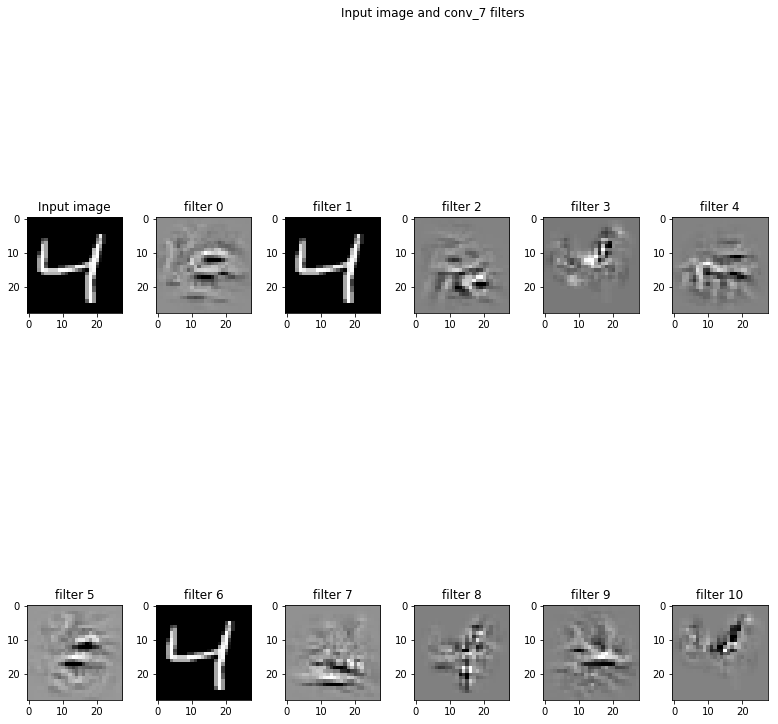

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv_7'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()